In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.colors
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot
from StringIO import StringIO
from pandas import Series, DataFrame, Panel
from numpy import nan as NA
# matplotlib.style.use('fivethirtyeight')
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# load all mbi-sos dataset; replace header names in file to be without spaces
mbi = pd.read_csv('jhmi-unreportable-raw-data-pos-types_SOS_MBI_2015.csv', header=0, names=('client','facility','setting','setting_id','position','sos1','sos2','sos3','sos4','sos5','sos6','sos7','sos8','sos9','mbi1','mbi2','mbi3','mbi4','mbi5'))

In [6]:
mbi.head(5)

,client,facility,setting,setting_id,position,sos1,sos2,sos3,sos4,sos5,sos6,sos7,sos8,sos9,mbi1,mbi2,mbi3,mbi4,mbi5
0,JHMI,Howard County General Hospital,1N/Psych,JHMI311,Administrator/Manager | Nurse Manager,5.0,5.0,6.0,5.0,7.0,7.0,6.0,5.0,7.0,3.0,2.0,2.0,1.0,2.0
1,JHMI,Howard County General Hospital,1N/Psych,JHMI311,Support - Clinical | Clinical Social Worker,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,4.0,4.0,4.0,1.0,4.0
2,JHMI,Howard County General Hospital,1N/Psych,JHMI311,Nurse | Registered Nurse,6.0,6.0,6.0,6.0,7.0,6.0,7.0,6.0,7.0,4.0,5.0,4.0,1.0,1.0
3,JHMI,Howard County General Hospital,1N/Psych,JHMI311,Nurse | Charge Nurse,6.0,4.0,5.0,6.0,7.0,4.0,4.0,5.0,7.0,7.0,6.0,6.0,2.0,6.0
4,JHMI,Howard County General Hospital,1N/Psych,JHMI311,Nurse | Registered Nurse,5.0,5.0,5.0,4.0,7.0,5.0,7.0,5.0,7.0,5.0,3.0,2.0,1.0,2.0


In [7]:
# view values in 'facility' column
mbi.facility.value_counts()

JHH                               5158
JHBMC                             1486
JHSH                               907
Sibley Memorial Hospital           890
Howard County General Hospital     885
Name: facility, dtype: int64

In [8]:
## create a df of only 'JHH' facility data
# https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas#17071908
#df.loc[df['A'] == 'foo']

jhh = mbi.loc[mbi['facility'] == 'JHH']
jhh.shape

(5158, 19)

In [9]:
# view values in 'position'
jhh.position.value_counts()

Nurse | Registered Nurse                                  1230
*Unspecified                                               728
Technician | Radiology                                     213
Nurse | Charge Nurse                                       201
Nurse | Critical Care                                      191
Technician | Other                                         173
Support - Other | Housekeeping                             170
Miscellaneous | Other                                      124
Support - Clinical | Pharmacist                            116
Support - Clinical | Nurse Aide/Assistant                  103
Physician - Resident | Other                                97
Support - Clinical | Other                                  94
Physician - Attending | Pediatrics                          81
Therapist | Respiratory                                     78
Support - Administrative | Customer Service                 70
Physician - Attending | Other                          

In [10]:
# create a df where: 'position' contains ('Physician') & (' | Medicine')
# issue with regex when the string contains a '|'
# (not working) som = jhh[jhh['position'].re.match('^Physician(.*?)\Medicine$')]

# x https://stackoverflow.com/questions/27178899/how-to-find-strings-in-pandas
# x dataset[dataset['Postcode'].str.contains(r"^EC4")]

# https://stackoverflow.com/questions/9947038/how-can-i-match-the-start-and-end-in-pythons-regex#9947065
# ^ftp://(.*?)\.jpg$



## 1. remove 'Emergency Medicine'
# ~ is inversion operator: https://stackoverflow.com/questions/17097643/search-for-does-not-contain-on-a-dataframe-in-pandas
# ~df["col"].str.contains(word)

non_em1 = jhh.loc[jhh['position'] != 'Physician - Attending | Emergency Medicine']
non_em2 = non_em1.loc[non_em1['position'] != 'Physician - Fellow | Emergency Medicine']
non_em3 = non_em2.loc[non_em2['position'] != 'Physician - Resident | Emergency Medicine']
non_em3.shape

(5132, 19)

In [11]:
# 2. select for Physician
# non_em3['position'].select('Physician')

# # https://stackoverflow.com/questions/29463068/return-rows-in-pandas-dataframe-where-tuple-in-column-contains-a-certain-value
# catdf = df[df['Col1'].str.contains("cat")]

physicians = non_em3[non_em3['position'].str.contains('Physician')]

In [12]:
som = physicians[physicians['position'].str.contains('Medicine')]

In [119]:
som = som.replace({'Physician - Attending | Medicine':'Attending','Physician - Resident | Medicine':'Resident','Physician - Fellow | Medicine':'Fellow'})

In [120]:
som.position.value_counts()

Resident     47
Attending    38
Fellow        4
Name: position, dtype: int64

In [121]:
som.head()

,client,facility,setting,setting_id,position,sos1,sos2,sos3,sos4,sos5,sos6,sos7,sos8,sos9,mbi1,mbi2,mbi3,mbi4,mbi5
2490,JHMI,JHH,AIP Pharmacy,132,Attending,6.0,4.0,1.0,5.0,3.0,5.0,6.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0
2853,JHMI,JHH,CCU,JHMI609,Resident,6.0,5.0,5.0,4.0,6.0,NaN,4.0,1.0,7.0,1.0,1.0,1.0,1.0,2.0
3272,JHMI,JHH,Dialysis,49,Attending,3.0,3.0,4.0,3.0,5.0,5.0,6.0,5.0,3.0,5.0,6.0,6.0,2.0,2.0
3280,JHMI,JHH,Echo,JHMI30926,Attending,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,2.0,4.0,1.0,1.0,1.0
3494,JHMI,JHH,Endoscopy,JHMI481,Attending,5.0,3.0,2.0,2.0,4.0,4.0,5.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0


In [137]:
params_circle = {'legend.fontsize': 'x-large',
          'figure.figsize': (5,5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params_circle)

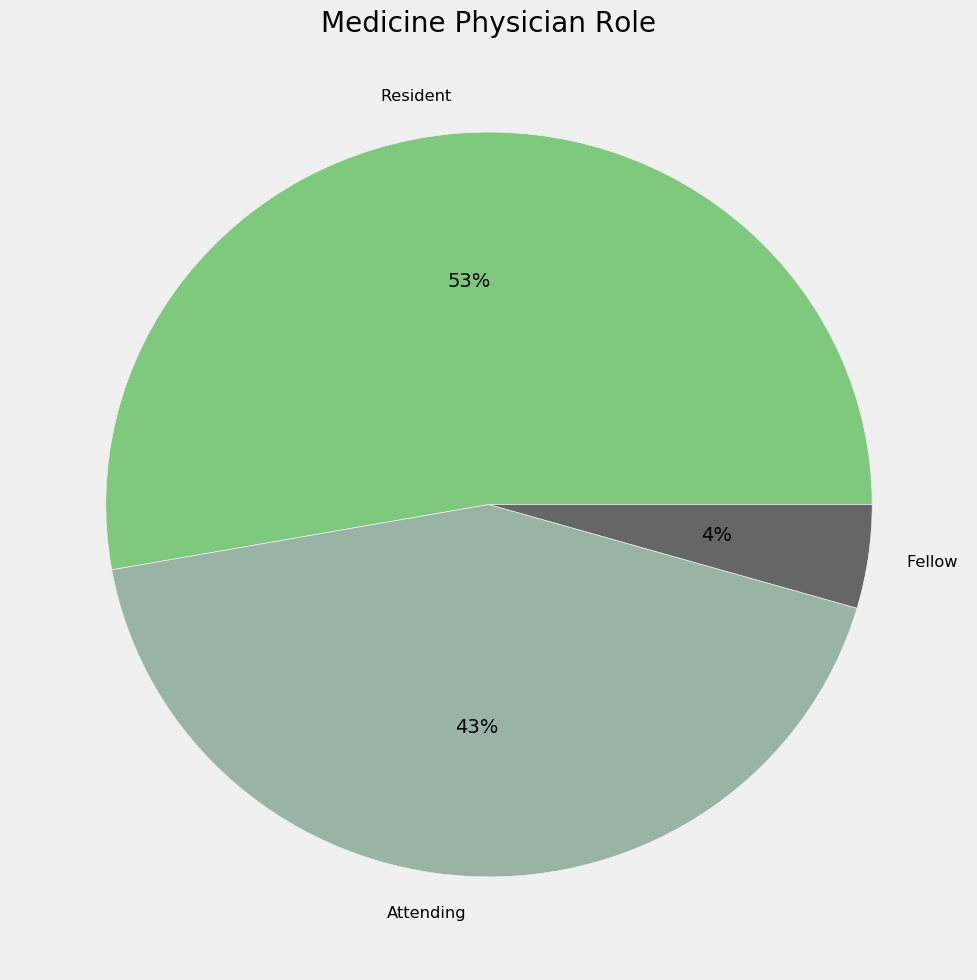

In [175]:
# # save as pdf
# with PdfPages('sos1.pdf') as pdf:
#     fig = sos1.plot(kind='bar',stacked=True,colormap='RdYlGn')
#     fig.set_title("SOS1: We have a good map of each other's talents and skills")
#     fig.set_xlabel('Physician Role')
#     fig.set_ylabel('Number of Responses')
#     fig.legend(loc=2, prop={'size':7.49})
#     plt.style.use('fivethirtyeight')
#     plt.tight_layout() # keeps the x label from being cut off
#     pdf.savefig()

# som.position.value_counts().plot(kind='pie',autopct='%1.1f%%',title='Department of Medicine Physicians Responses')

som_role = som.position.value_counts()

with PdfPages('role.pdf') as pdf:
    fig = som_role.plot(kind='pie',autopct='%1.f%%',colormap='Accent')
    fig.set_title("Medicine Physician Role")
    plt.style.use('fivethirtyeight')
    fig.set_ylabel('')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

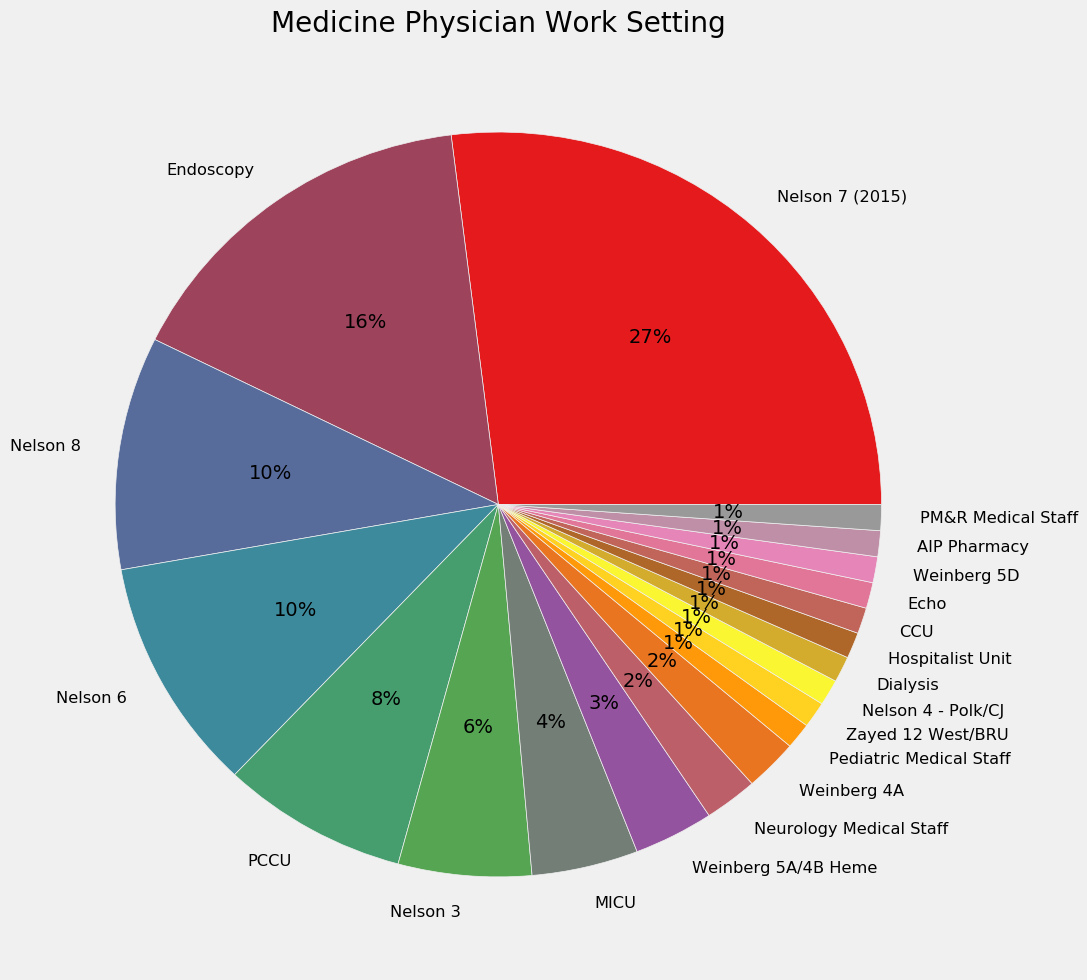

In [174]:
som_setting = som.setting.value_counts()

with PdfPages('setting.pdf') as pdf:
    fig = som_setting.plot(kind='pie',autopct='%1.f%%',colormap='Set1')
    fig.set_title("Medicine Physician Work Setting")
    plt.style.use('fivethirtyeight')
    fig.set_ylabel('')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

In [164]:
params_bar = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params_bar)

In [188]:
sos1 = som.groupby(['position','sos1'])['position'].count().unstack('sos1')
sos2 = som.groupby(['position','sos2'])['position'].count().unstack('sos2')
sos3 = som.groupby(['position','sos3'])['position'].count().unstack('sos3')
sos4 = som.groupby(['position','sos4'])['position'].count().unstack('sos4')
sos5 = som.groupby(['position','sos5'])['position'].count().unstack('sos5')
sos6 = som.groupby(['position','sos6'])['position'].count().unstack('sos6')
sos7 = som.groupby(['position','sos7'])['position'].count().unstack('sos7')
sos8 = som.groupby(['position','sos8'])['position'].count().unstack('sos8')
sos9 = som.groupby(['position','sos9'])['position'].count().unstack('sos9')

In [209]:
sos_col = ['Not at all','To a very limited extent','To a limited extent','To a moderate extent','To a considerable extent','To a very great extent','To a very great extent']
sos_col5 = ['To a limited extent','To a moderate extent','To a considerable extent','To a very great extent','To a very great extent']
sos_col6 = ['Not at all','To a limited extent','To a moderate extent','To a considerable extent','To a very great extent','To a very great extent']
sos_col7 = ['To a very limited extent','To a limited extent','To a moderate extent','To a considerable extent','To a very great extent','To a very great extent']

In [210]:
# label columns with likert responses
sos1.columns = sos_col
sos2.columns = sos_col
sos3.columns = sos_col
sos4.columns = sos_col
sos5.columns = sos_col5
sos6.columns = sos_col6
sos7.columns = sos_col7
sos8.columns = sos_col
sos9.columns = sos_col

In [178]:
sos1

,Not at all,To a very limited extent,To a limited extent,To a moderate extent,To a considerable extent,To a very great extent,To a very great extent
position,,,,,,,
Attending,4.0,1.0,7.0,7.0,6.0,7.0,6.0
Fellow,NaN,NaN,2.0,NaN,1.0,1.0,NaN
Resident,1.0,NaN,6.0,9.0,16.0,11.0,3.0


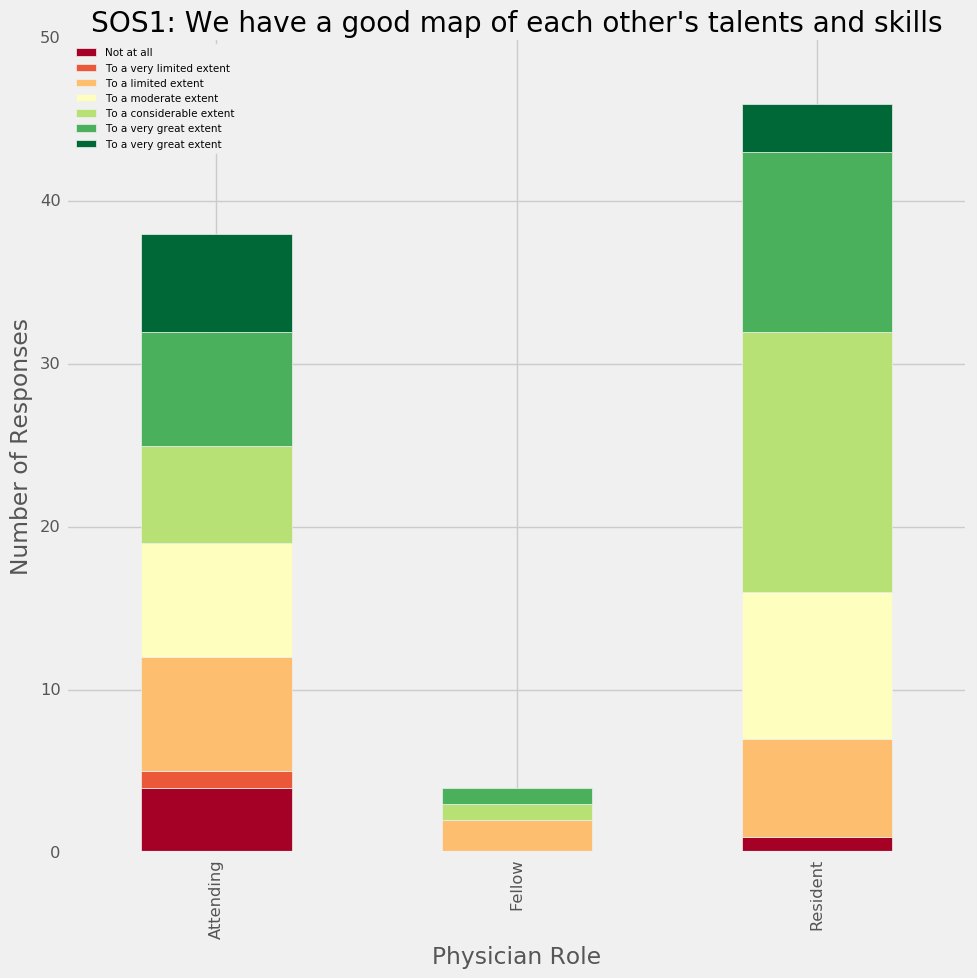

In [211]:
# https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
# test5 = faultdf.groupby(['Site Name', 'Abuse/NFF'])['Site Name'].count().unstack('Abuse/NFF').fillna(0)
# test5.plot(kind='bar', stacked=True)

## set colormap
# https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors#11927922
# https://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps

# save as pdf

## SOS 1
with PdfPages('sos1.pdf') as pdf:
    fig = sos1.plot(kind='bar',stacked=True,colormap='RdYlGn')
    fig.set_title("SOS1: We have a good map of each other's talents and skills")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

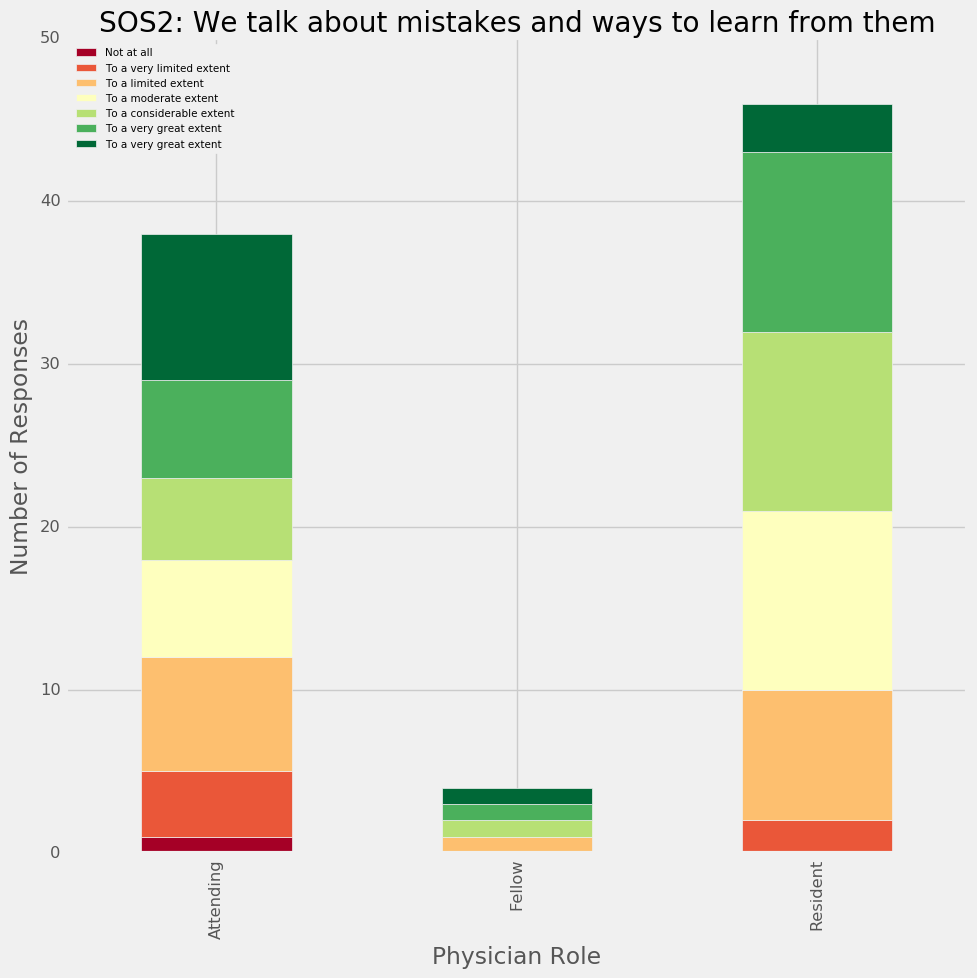

In [212]:
## SOS 2
with PdfPages('sos2.pdf') as pdf:
    fig = sos2.plot(kind='bar',stacked=True,colormap='RdYlGn')
    fig.set_title("SOS2: We talk about mistakes and ways to learn from them")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

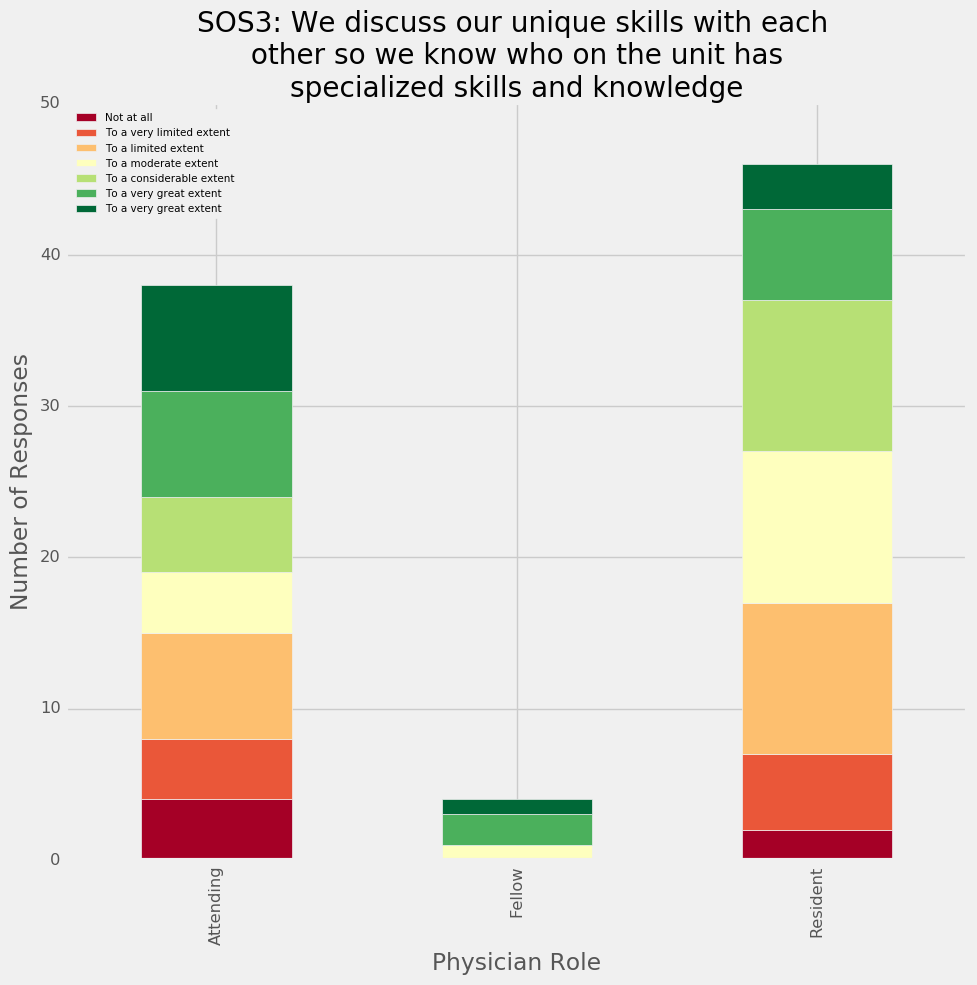

In [215]:
## SOS 3
with PdfPages('sos3.pdf') as pdf:
    fig = sos3.plot(kind='bar',stacked=True,colormap='RdYlGn')
    fig.set_title("SOS3: We discuss our unique skills with each \n other so we know who on the unit has \nspecialized skills and knowledge")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

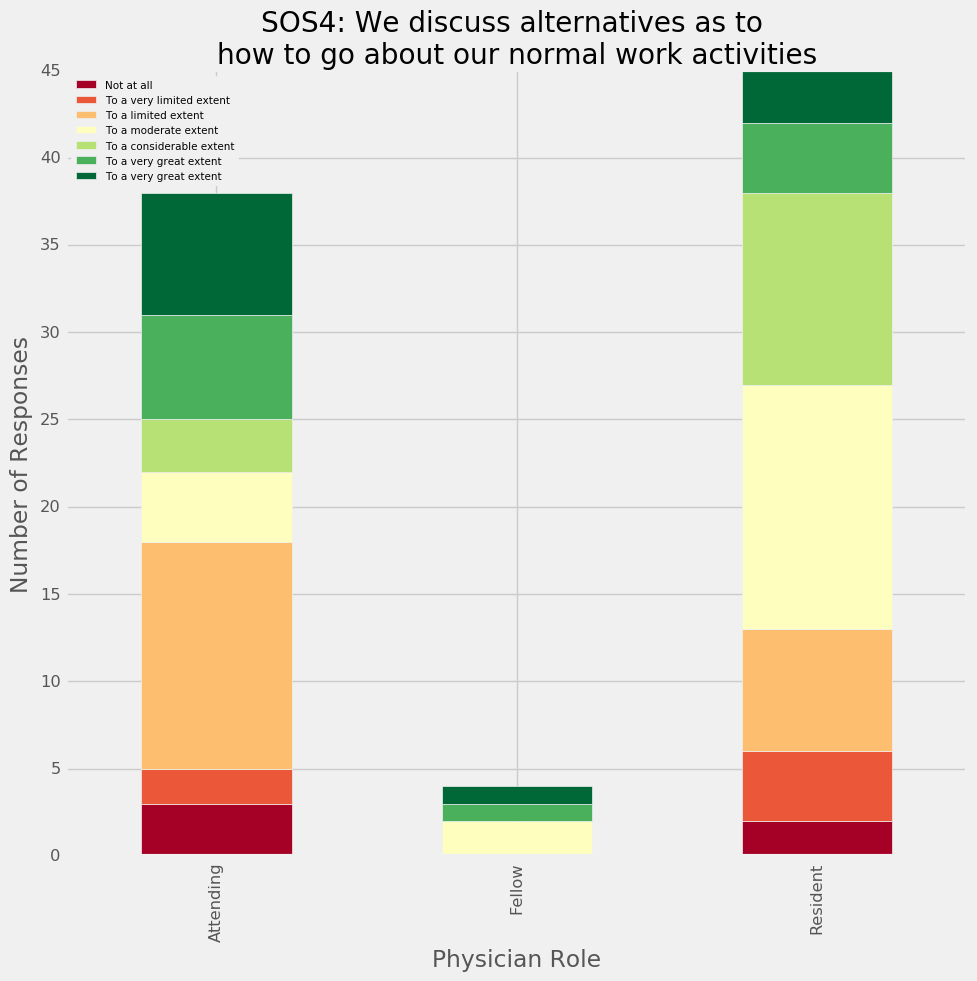

In [226]:
## SOS 4
with PdfPages('sos4.pdf') as pdf:
    fig = sos4.plot(kind='bar',stacked=True,colormap='RdYlGn')
    fig.set_title("SOS4: We discuss alternatives as to \nhow to go about our normal work activities")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

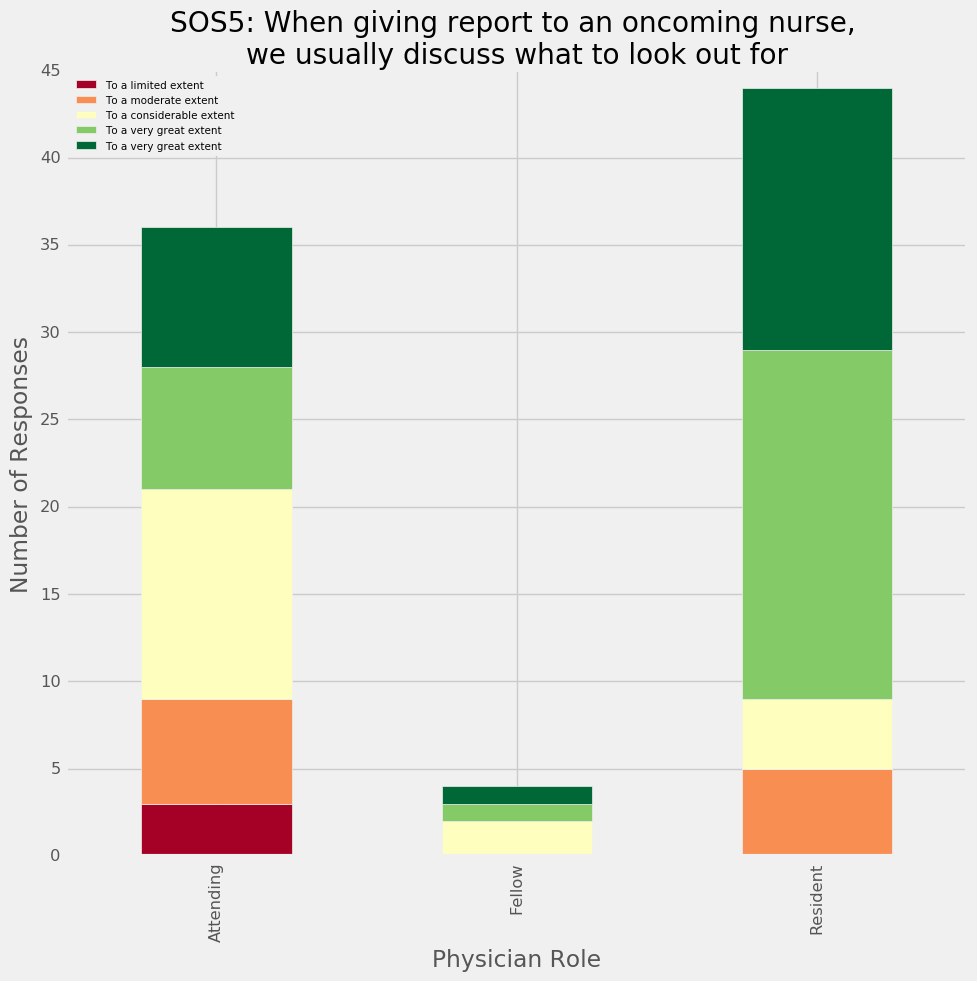

In [217]:
## SOS 5
with PdfPages('sos5.pdf') as pdf:
    fig = sos5.plot(kind='bar',stacked=True,colormap='RdYlGn')
    fig.set_title("SOS5: When giving report to an oncoming nurse, \nwe usually discuss what to look out for")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

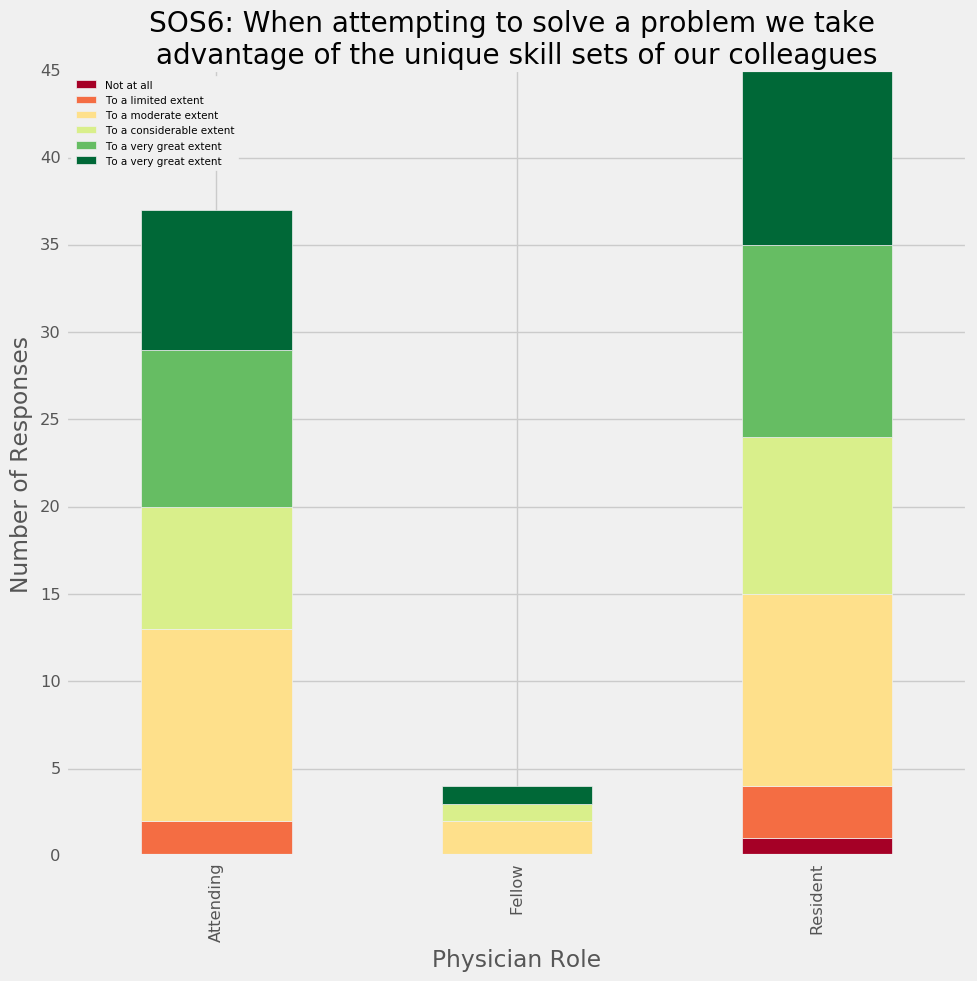

In [218]:
## SOS 6
with PdfPages('sos6.pdf') as pdf:
    fig = sos6.plot(kind='bar',stacked=True,colormap='RdYlGn')
    fig.set_title("SOS6: When attempting to solve a problem we take \nadvantage of the unique skill sets of our colleagues")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

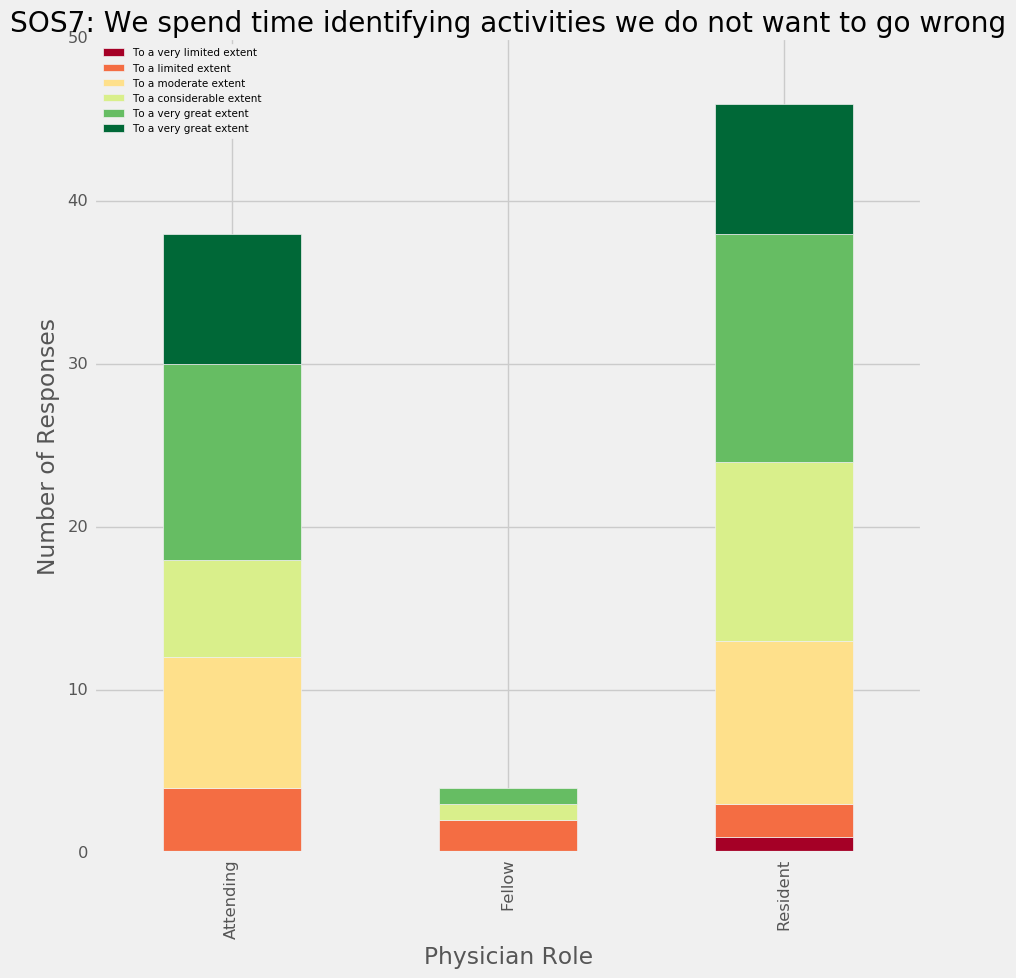

In [220]:
## SOS 7
with PdfPages('sos7.pdf') as pdf:
    fig = sos7.plot(kind='bar',stacked=True,colormap='RdYlGn')
    fig.set_title("SOS7: We spend time identifying activities we do not want to go wrong")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

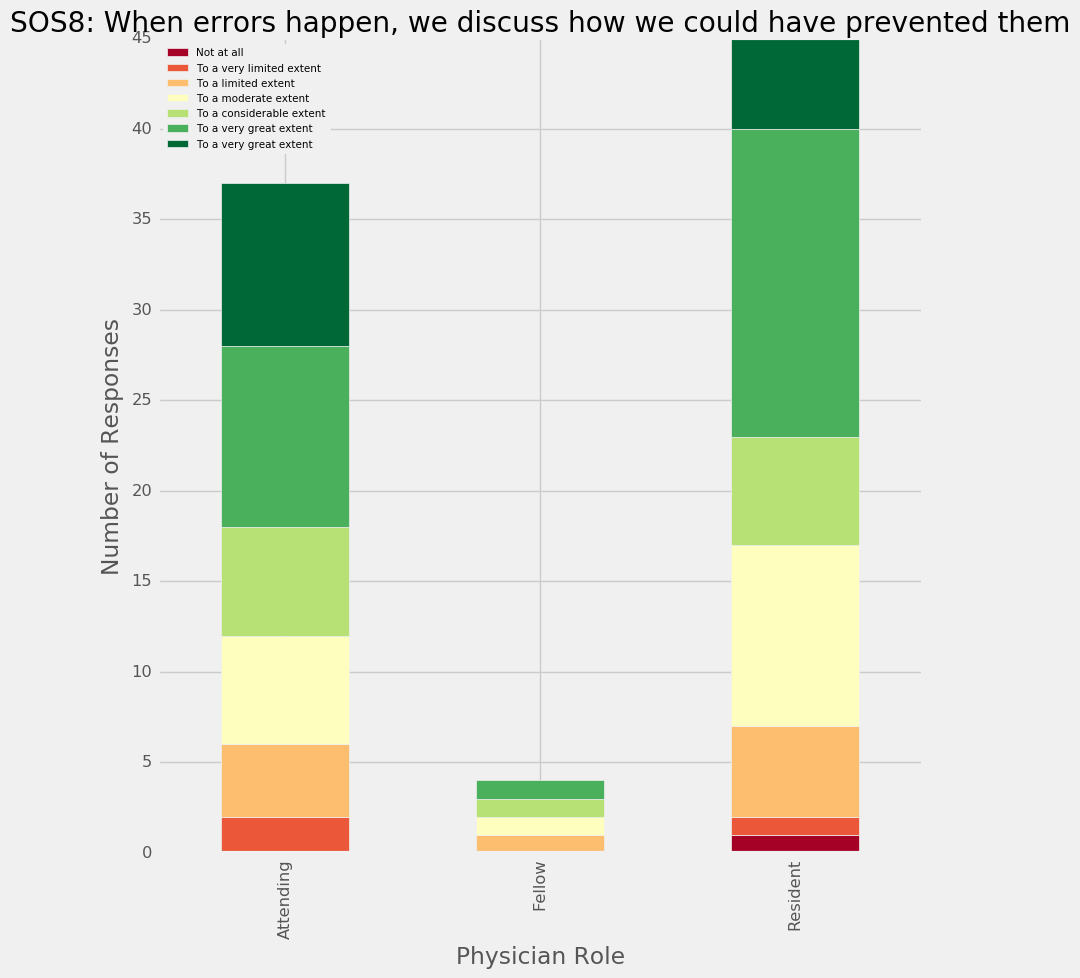

In [222]:
## SOS 8
with PdfPages('sos8.pdf') as pdf:
    fig = sos8.plot(kind='bar',stacked=True,colormap='RdYlGn')
    fig.set_title("SOS8: When errors happen, we discuss how we could have prevented them")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

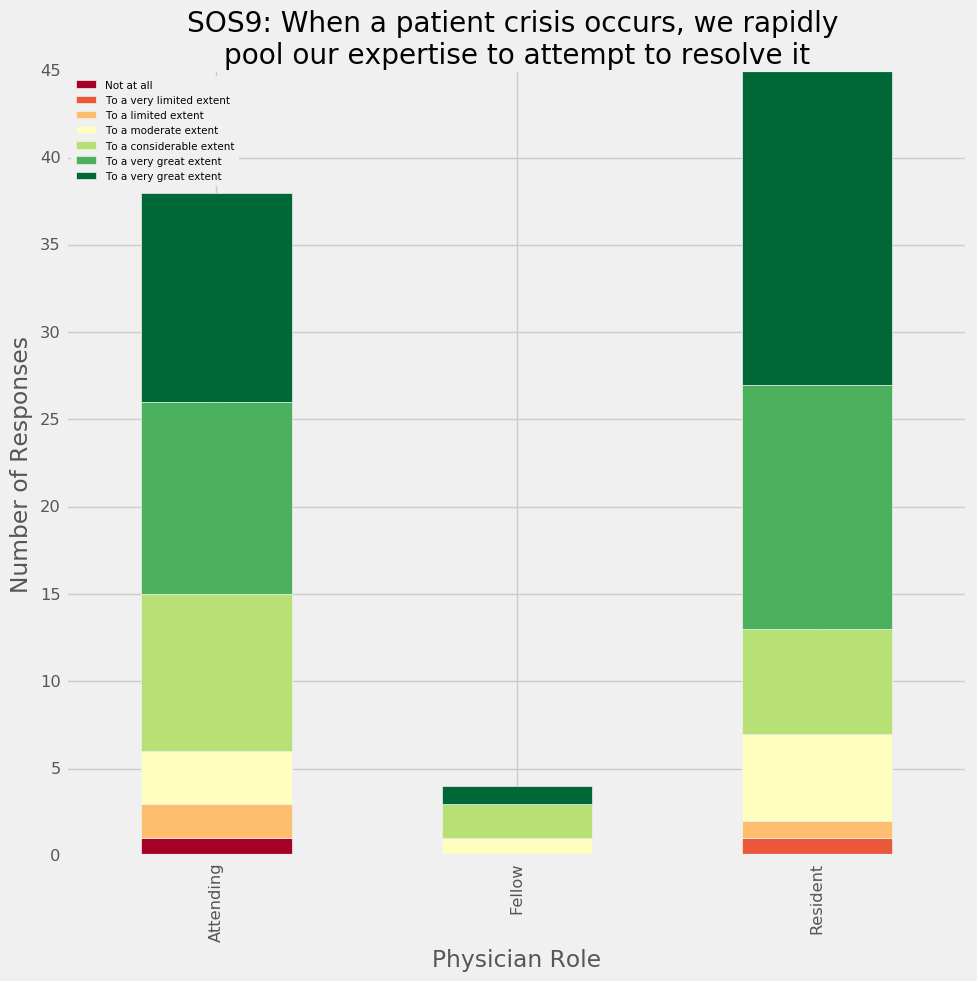

In [225]:
## SOS 9
with PdfPages('sos9.pdf') as pdf:
    fig = sos9.plot(kind='bar',stacked=True,colormap='RdYlGn')
    fig.set_title("SOS9: When a patient crisis occurs, we rapidly \npool our expertise to attempt to resolve it")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

In [232]:
mbi1 = som.groupby(['position','mbi1'])['position'].count().unstack('mbi1')
mbi2 = som.groupby(['position','mbi2'])['position'].count().unstack('mbi2')
mbi3 = som.groupby(['position','mbi3'])['position'].count().unstack('mbi3')
mbi4 = som.groupby(['position','mbi4'])['position'].count().unstack('mbi4')
mbi5 = som.groupby(['position','mbi5'])['position'].count().unstack('mbi5')

In [233]:
mbi_col = ['Never','A few times a year or less','Once a month or less','A few times a month','Once a week','A few times a week','Every day']

In [234]:
mbi1.columns = mbi_col
mbi2.columns = mbi_col
mbi3.columns = mbi_col
mbi4.columns = mbi_col
mbi5.columns = mbi_col

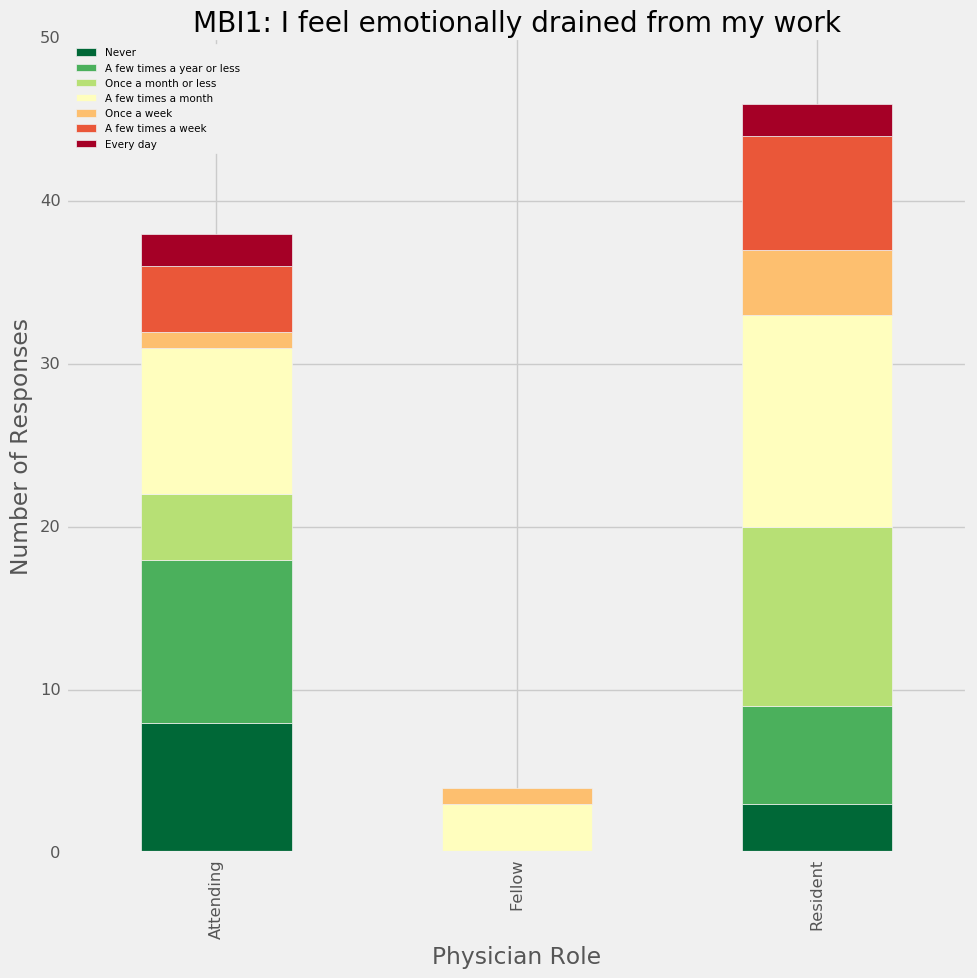

In [236]:
## MBI 1
with PdfPages('mbi1.pdf') as pdf:
    fig = mbi1.plot(kind='bar',stacked=True,colormap='RdYlGn_r')
    fig.set_title("MBI1: I feel emotionally drained from my work")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

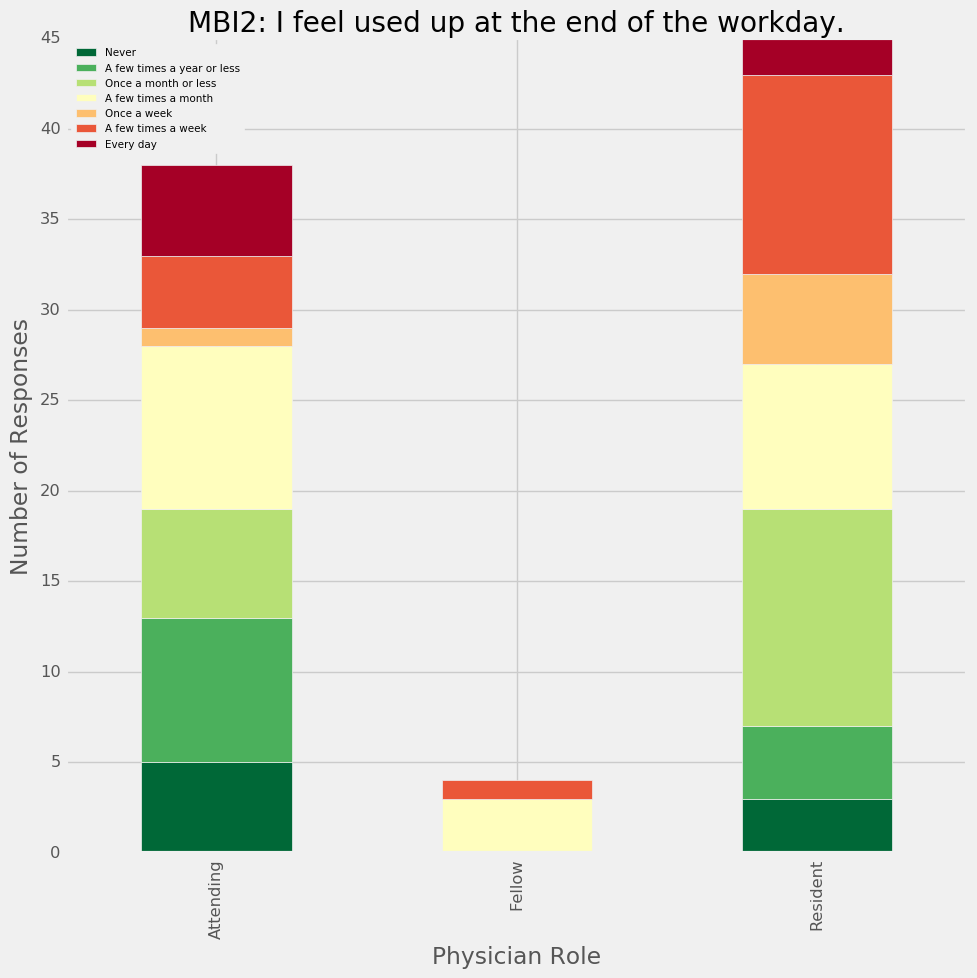

In [237]:
## MBI 2
with PdfPages('mbi2.pdf') as pdf:
    fig = mbi2.plot(kind='bar',stacked=True,colormap='RdYlGn_r')
    fig.set_title("MBI2: I feel used up at the end of the workday.")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

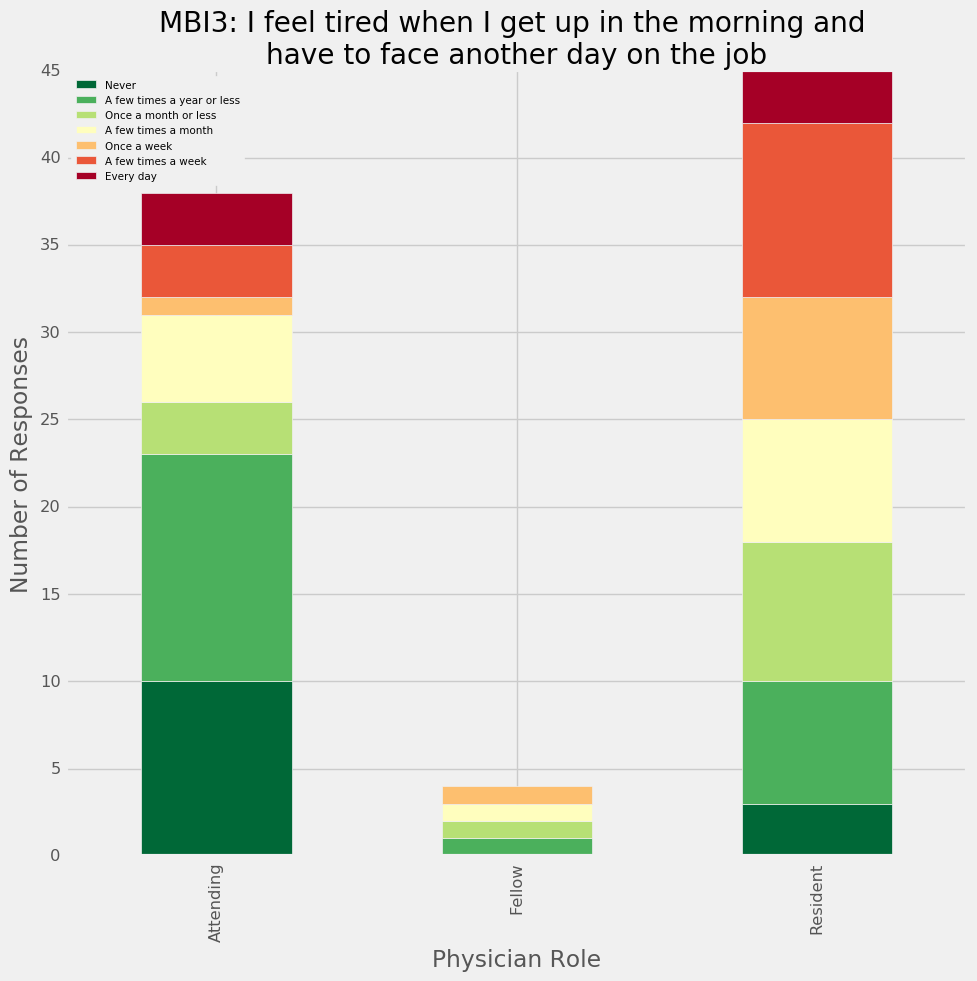

In [238]:
## MBI 3
with PdfPages('mbi3.pdf') as pdf:
    fig = mbi3.plot(kind='bar',stacked=True,colormap='RdYlGn_r')
    fig.set_title("MBI3: I feel tired when I get up in the morning and \nhave to face another day on the job")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

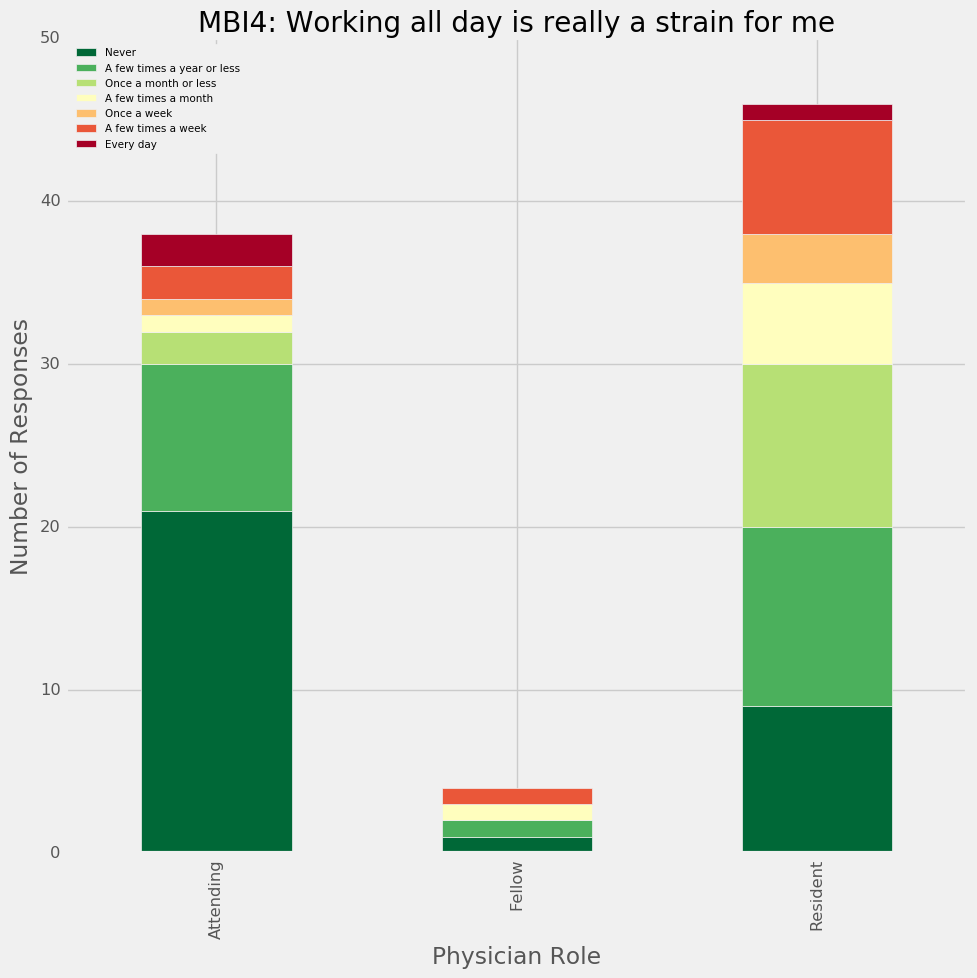

In [239]:
## MBI 4
with PdfPages('mbi4.pdf') as pdf:
    fig = mbi4.plot(kind='bar',stacked=True,colormap='RdYlGn_r')
    fig.set_title("MBI4: Working all day is really a strain for me")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()

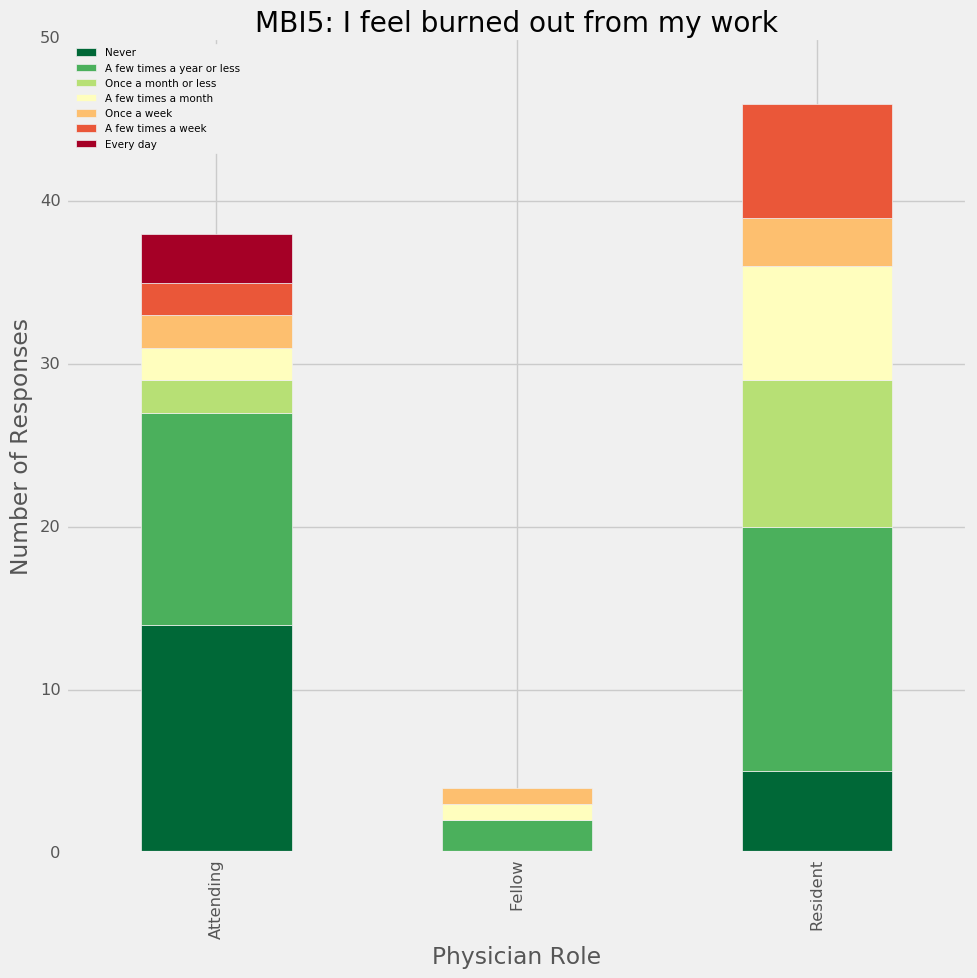

In [240]:
## MBI 5
with PdfPages('mbi5.pdf') as pdf:
    fig = mbi5.plot(kind='bar',stacked=True,colormap='RdYlGn_r')
    fig.set_title("MBI5: I feel burned out from my work")
    fig.set_xlabel('Physician Role')
    fig.set_ylabel('Number of Responses')
    fig.legend(loc=2, prop={'size':7.49})
    plt.style.use('fivethirtyeight')
    plt.tight_layout() # keeps the x label from being cut off
    pdf.savefig()